In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('/content/coffeesale.csv')
df.sample(5)

,date,datetime,cash_type,card,money,coffee_name
986,2024-07-18,2024-07-18 21:46:18.674,card,ANON-0000-0000-0384,32.82,Latte
826,2024-06-19,2024-06-19 18:28:43.437,card,ANON-0000-0000-0153,37.72,Cappuccino
558,2024-05-22,2024-05-22 12:29:50.841,card,ANON-0000-0000-0012,27.92,Americano
929,2024-07-06,2024-07-06 19:09:46.107,card,ANON-0000-0000-0012,32.82,Latte
274,2024-04-12,2024-04-12 19:38:23.189,card,ANON-0000-0000-0009,28.90,Cortado


<Axes: >

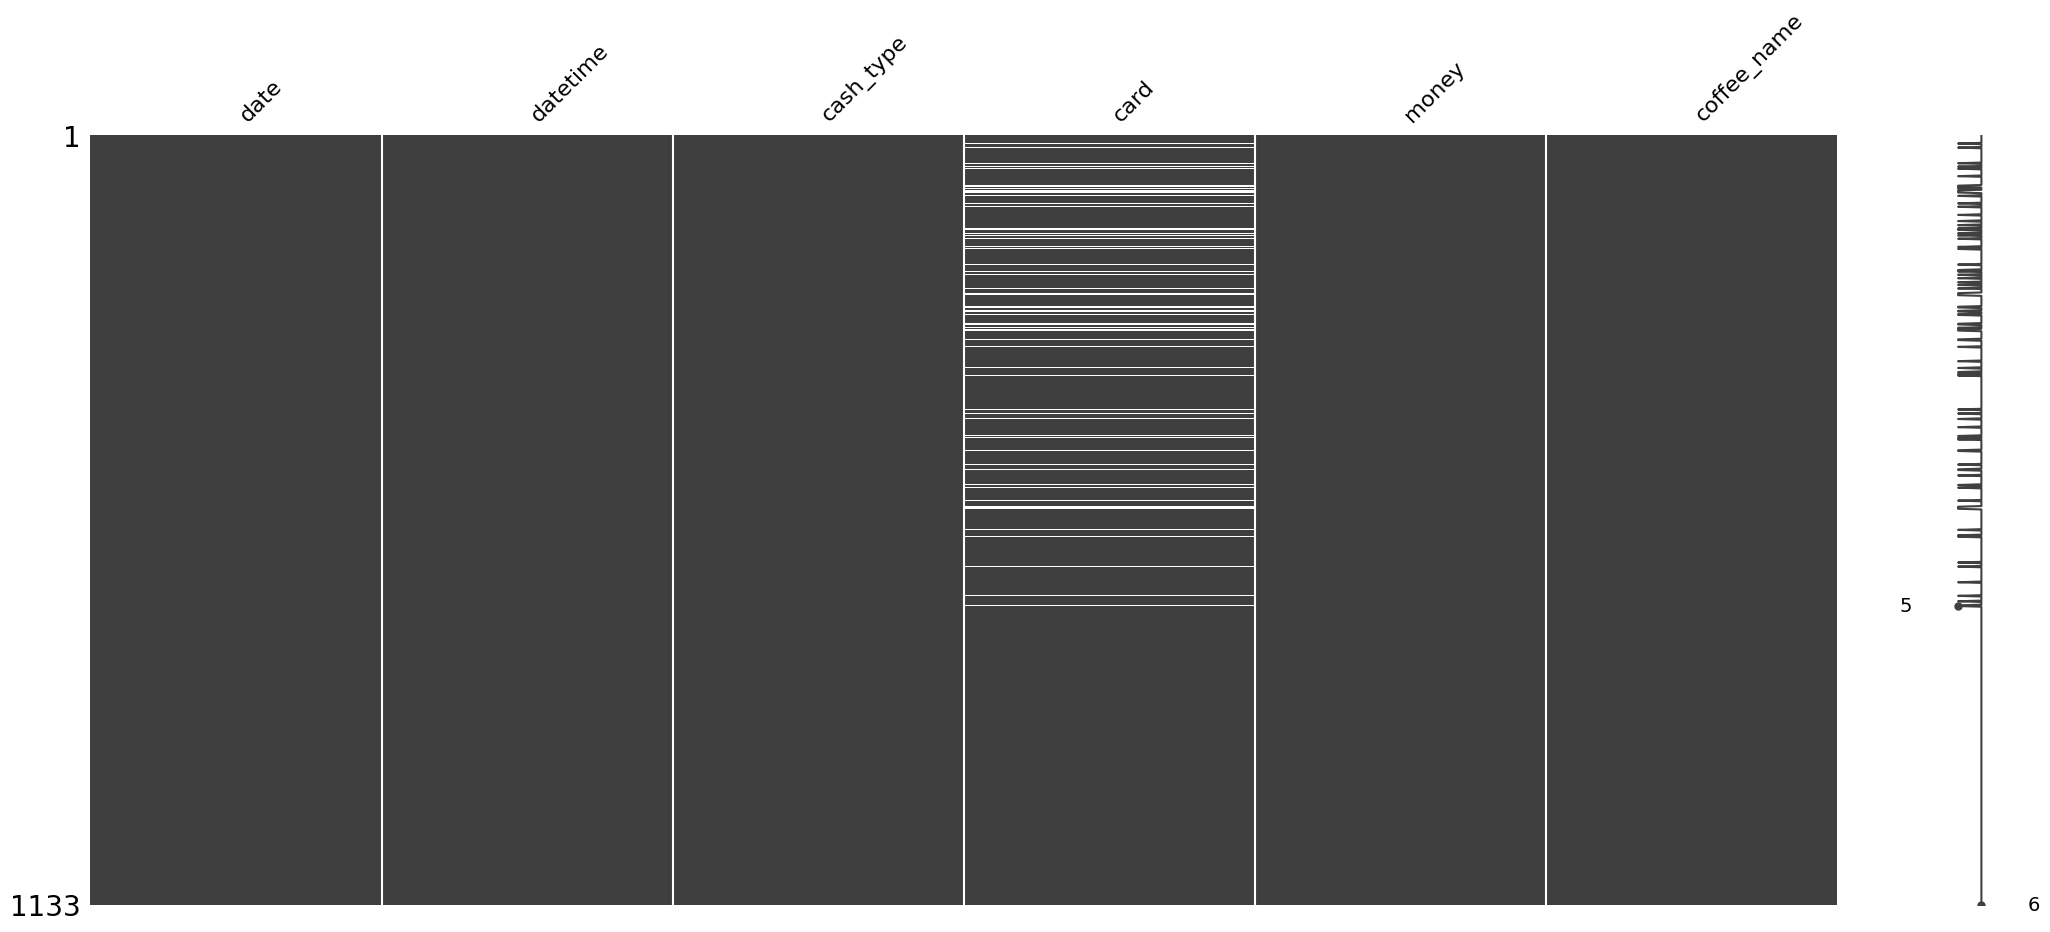

In [23]:
#check missing value
import missingno as msno
msno.matrix(df)

#### -> The result shows that the 'card' column is missing data with cards because the rows missing this data are customers paying by cash. Therefore, we can ignore this column because it is not too important data needed in this analysis.

In [24]:
#check duplicate values
df.duplicated().sum()

0

#### -> The values were not duplicated.

In [25]:
#check unique values
cate_col = ['cash_type', 'coffee_name']
for i in cate_col:
  unique_values = df[i].unique()
  print(f'Unique values in {i}: {unique_values}')

Unique values in cash_type: ['card' 'cash']
Unique values in coffee_name: ['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


In [26]:
#check dtype
df.dtypes.reset_index()

,index,0
0,date,object
1,datetime,object
2,cash_type,object
3,card,object
4,money,float64
5,coffee_name,object


-> Should changinng the data types from 'object' to 'datetime' for datetime column before draw visualization.

In [27]:
#check mean, std của float
df.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


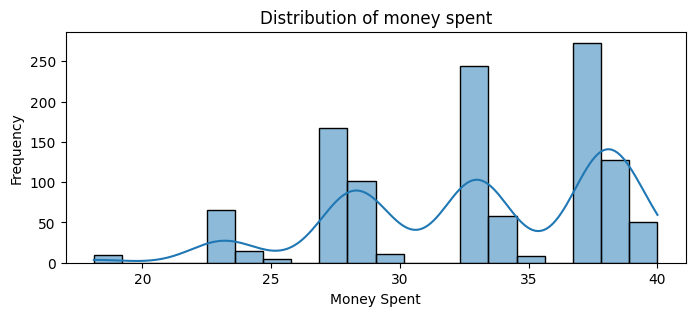

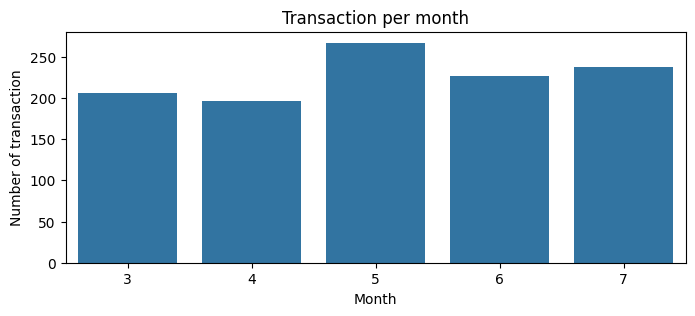

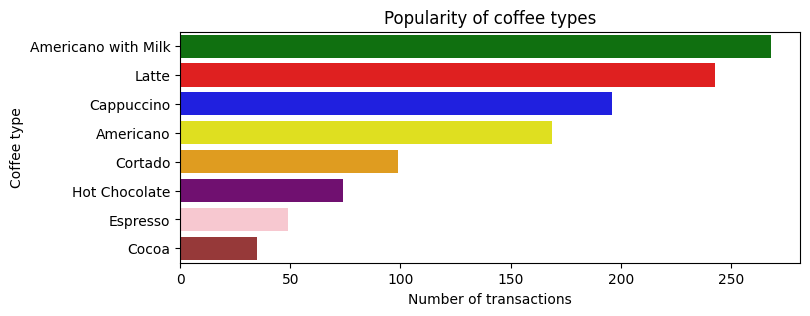

In [32]:
#distribution of money spent
plt.figure(figsize=(8,3))
sns.histplot(df['money'], bins=20, kde=True)
plt.xlabel('Money Spent')
plt.ylabel('Frequency')
plt.title('Distribution of money spent')
plt.show

#changing date time
df['date'] = pd.to_datetime(df['date']) #change dtpyes
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

plt.figure(figsize=(8,3))
sns.countplot(x='month', data=df)
plt.title('Transaction per month')
plt.xlabel('Month')
plt.ylabel('Number of transaction')
plt.show()

#popularity of coffee types
colors = ['green', 'red', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
palette = sns.color_palette(colors[:len(df['coffee_name'].value_counts().index)])

plt.figure(figsize=(8,3))
sns.countplot(y='coffee_name', data=df, palette=palette, order=df['coffee_name'].value_counts().index)
plt.title('Popularity of coffee types')
plt.xlabel('Number of transactions')
plt.ylabel('Coffee type')
plt.show()

- First chart: Most of the customers agreed to spend the most amount of `37-40`, followed by `33-35` and `26-30`.

- Second chart: In May, the spending level was recorded to be high, this could be the month of `festivals`, customers do not go to work and they can hangout to grab a cup of tea.

- The last chart: The most popular coffee type that customers love the most is at the top of the list is `Americano with Milk`.

In [33]:
df.head(2)

,date,datetime,cash_type,card,money,coffee_name,day,month,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,1,3,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,3,12


In [10]:
df.drop(['date', 'datetime', 'card'], axis=1, inplace=True)

In [11]:
df.head(2)

,cash_type,money,coffee_name,day,month,hour
0,card,38.7,Latte,1,3,10
1,card,38.7,Hot Chocolate,1,3,12


## Preparing the data to apply in ML ⬇

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cash_type    1133 non-null   object 
 1   money        1133 non-null   float64
 2   coffee_name  1133 non-null   object 
 3   day          1133 non-null   int32  
 4   month        1133 non-null   int32  
 5   hour         1133 non-null   int32  
dtypes: float64(1), int32(3), object(2)
memory usage: 40.0+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['cash_type'] = label_encoder.fit_transform(df['cash_type'])
df = pd.get_dummies(df, columns=['coffee_name'], drop_first=True)
coffee_name_col = [col for col in df.columns if 'coffee_name' in col]
df[coffee_name_col] = df[coffee_name_col].astype(int)

#### -> Changing data from text to numerical

In [14]:
df

,cash_type,money,day,month,hour,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,0,38.70,1,3,10,0,0,0,0,0,0,1
1,0,38.70,1,3,12,0,0,0,0,0,1,0
2,0,38.70,1,3,12,0,0,0,0,0,1,0
3,0,28.90,1,3,13,0,0,0,0,0,0,0
4,0,38.70,1,3,13,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1128,0,23.02,31,7,20,0,0,0,1,0,0,0
1129,0,27.92,31,7,20,1,0,0,0,0,0,0
1130,0,32.82,31,7,21,0,0,0,0,0,0,1
1131,0,32.82,31,7,21,0,0,0,0,0,0,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [16]:
X = df.drop(['money'], axis=1)
y = df['money']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

models = [LinearRegression(), DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(random_state=42), GradientBoostingRegressor(random_state=42),
          xgb.XGBRegressor(eval_metric='rmse', random_state=42)]

model_names = ['Liner Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']

#train models
results = {}
for name, model in zip(model_names,models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R2: {metrics['R2']}")

Liner Regression - MSE: 1.4234003975988991, R2: 0.9235408097100472
Decision Tree - MSE: 0.00881057268722467, R2: 0.9995267324255408
Random Forest - MSE: 0.04567213872011791, R2: 0.9975466813475384
Gradient Boosting - MSE: 0.2050837500087186, R2: 0.9889837480067134
XGBoost - MSE: 0.072505094911348, R2: 0.9961053257690743


1. Mean Squared Error (MSE)
MSE measures the degree of deviation between the model's predicted values ​​and the actual values. Specifically, it is the average of the squared errors between the predicted values ​​and the actual values. The smaller the MSE, the more accurate the model.

Read the MSE data:

Linear Regression: 0.0628
Decision Tree: 0.0243
Random Forest: 0.0261
Gradient Boosting: 0.2581
XGBoost: 0.0103
Interpretation:

XGBoost has the lowest MSE (0.0103), which means it has the lowest prediction error, and therefore, has the best performance among the compared models in terms of mean square error.
Gradient Boosting has the highest MSE (0.2581), indicating that it has a higher error than the other models, and may not be as accurate as the other models.

---

2. Coefficient of Determination (R²)
R² measures the proportion of variance in the target data that is explained by the model. R² values ​​range from 0 to 1, with values ​​close to 1 indicating that the model does a better job of explaining a large portion of the variation in the data. The higher the R² value, the better the model.

Read the data R²:

Linear Regression: 0.9971
Decision Tree: 0.9989
Random Forest: 0.9988
Gradient Boosting: 0.9879
XGBoost: 0.9995
Interpretation:

XGBoost has the highest R² (0.9995), indicating that this model explains the variation of the target data very well.

Gradient Boosting has the lowest R² (0.9879), but is still very high, indicating that this model explains most of the variation of the data but not as well as the other models.
Summary and analysis:
XGBoost has the best performance with the lowest MSE and highest R², indicating that it predicts most accurately and explains the variation of the target data best.
Decision Tree and Random Forest also perform well with low MSE and R² close to XGBoost, but not as well as XGBoost in terms of optimal performance.
Linear Regression performs well with low MSE and high R², but not as well as ensemble models like XGBoost and Random Forest.
Gradient Boosting has higher MSE and lower R² than the other models, which suggests it may not perform well in this case.